# Traveling Salesman Problem dengan GA

- Misalkan ada 5 buah kota yang akan dikunjungi : A, B, C,D dan E 
- Masing-masing kota dinyatakan dengan koordinat x dan y
- A (0,0), B (5,6), C (1,4), D (3,4), E (7,7)
- Tujuan : menentukan rute terpendek untuk mengunjungi 5 kota tersebut




In [1]:
import numpy as np # digunakan untuk membuat array kosong yang bisa diisi data sesuai ukuran dan type yang akan ditentukan
import random # digunakan untuk merandom populasi, crossover, dan mutasi
import matplotlib.pyplot as plt # membuat visualisasi grafik dalam bentuk plot


In [2]:
# membuat koordinat kota dalam list
daftarKota = [[0,0], [5,6], [1,4], [3,4], [7,7]] # [0, 1, 2, 3, 4]
for i in daftarKota:
    for j in i:
        print(j, end=" ")
    print()

jumlahKota = len(daftarKota)
print("Jumlah kota: ", jumlahKota)


0 0 
5 6 
1 4 
3 4 
7 7 
Jumlah kota:  5


## 1. inisialisasi populasi

inisialisasi secara random dengan random permutation

In [3]:
def initPopulasi(ukuranPopulasi, jumlahKota):
    P = np.empty((ukuranPopulasi, jumlahKota))
    P = P.astype(int)
    for i in range(ukuranPopulasi):
        I = np.random.permutation(jumlahKota)
        for j in range(jumlahKota):
            P[i][j] = I[j]
    return P

ukuranPopulasi = 4
P = initPopulasi(ukuranPopulasi, jumlahKota)
print("Populasi awal:\n ", P)

Populasi awal:
  [[2 0 1 3 4]
 [1 0 3 2 4]
 [1 0 4 2 3]
 [3 1 0 4 2]]


menghitung kualitas solusi (fitness)

In [4]:

def hitungKualitas(populasi, daftarKota):
    size = populasi.shape
    ukuranPopulasi = size[0]
    jumlahKota = size[1]

    matrikJarak = np.empty((ukuranPopulasi))
    matrikJarak = matrikJarak.astype('float')
    n = len(daftarKota)

    for i in range(ukuranPopulasi):
        jarak = 0
        for j in range(n-1):
            jarakX = daftarKota[populasi[i][j]][0
            ] - daftarKota[populasi[i][j+1]][0]
            jarakY = daftarKota[populasi[i][j]][1] - daftarKota[populasi[i][j+1]][1]
            d = np.sqrt(jarakX**2 + jarakY**2)
            jarak = jarak + d

        dn = np.sqrt((daftarKota[populasi[i][n-1]][0] - daftarKota[populasi[i][0]][0])**2 + (daftarKota[populasi[i][n-1]][1] - daftarKota[populasi[i][0]][1])**2)

        jarak = jarak + dn
        matrikJarak[i] = jarak

    return matrikJarak

fitnessPopulasi = hitungKualitas(P, daftarKota) 
print("Fitness populasi awal: ", fitnessPopulasi)


     


Fitness populasi awal:  [26.46998636 23.75452159 29.24637567 29.24637567]


## 2. seleksi
- menggunakan metode turnamen dengan ukuran k = 2
- jumlah induk yang nantinya akan dipilih adalah 2

In [5]:
def seleksi(P, individu):
    jumlahInduk = 2
    size = P.shape
    ukuranPopulasi = size[0]
    jumlahKota = size[1]

    Induk = np.empty((jumlahInduk, jumlahKota))
    Induk = Induk.astype(int)

    for i in range(jumlahInduk):
        #seleksi dengan turnamen
        random1 = random.randint(0, ukuranPopulasi-1)
        random2 = random.randint(0, ukuranPopulasi-1)

        if individu[random1] < individu[random2]:
            for j in range(jumlahKota):
                Induk[i][j] = P[random1][j]
        else:
            for j in range(jumlahKota):
                Induk[i][j] = P[random2][j]
    return Induk
    
Induk = seleksi(P, fitnessPopulasi)
print("Induk:\n ", Induk)

Induk:
  [[2 0 1 3 4]
 [1 0 3 2 4]]


## 3. Reproduksi

- membuat fungsi crossover dengan PMX

In [6]:
def crossover(Induk):
    size = Induk.shape
    baris = size[0]
    kolom = size[1]

    I1 = np.empty((kolom))
    I2 = np.empty((kolom))
    A1 = np.empty((kolom))
    A2 = np.empty((kolom))
    Anak = np.empty((baris, kolom)) 
    Anak = Anak.astype(int)

    for i in range(kolom):
        I1[i] = Induk[0][i]
        I2[i] = Induk[1][i]
    
    random1 = random.randint(1, kolom-2)

    for i0 in range(kolom):
        A1[i0] = I1[i0]
        A2[i0] = I2[i0]
    
    batasCek1 = random1
    batasCek2 = random1

    for i in range(kolom):
        m = (i + random1) % kolom

        n1 = I1[m]
        n2 = I2[m]

        # cek apakah n1 dan n2 ada di A1 dan A2

        idxAda1 = 0
        idxAda2 = 0

        for j1 in range(batasCek1):

            if batasCek1 > kolom:
                idxAda1 = 1
            if A1[j1] == n2:
                idxAda1 = 1
        
        for j2 in range(batasCek2):
            if batasCek2 > kolom:
                idxAda2 = 1
            if A2[j2] == n1:
                idxAda2 = 1

        if idxAda1 == 0:
            A1[batasCek1] = n2
            batasCek1 = batasCek1 + 1
        
        if idxAda2 == 0:
            A2[batasCek2] = n1
            batasCek2 = batasCek2 + 1
        
    for i in range(kolom):
        Anak[0][i] = A1[i]
        Anak[1][i] = A2[i]
    
    return Anak

AnakCrossover = crossover(Induk)
print("Anak dari crossover:\n ", AnakCrossover)


Anak dari crossover:
  [[2 0 3 4 1]
 [1 0 3 4 2]]


- Membuat mutasi dengan swap

In [7]:
def mutasi(Induk):
    size = Induk.shape
    baris = size[0]
    kolom = size[1]
    
    Anak = np.empty((baris, kolom))
    Anak = Anak.astype(int)

    Anak = Induk

    random1 = random.randint(0, kolom-1)
    random2 = random.randint(0, kolom-1)

    while random1 == random2:
        random2 = random.randint(0, kolom-1)
    
    if random1 < random2:
        rs1 = random1
        rs2 = random2
    else:
        rs1 = random2
        rs2 = random1
    
    I1rs1 = Induk[0][rs1]
    I1rs2 = Induk[0][rs2]
    I2rs1 = Induk[1][rs1]
    I2rs2 = Induk[1][rs2]

    Anak[0][rs1] = I1rs2
    Anak[0][rs2] = I1rs1
    Anak[1][rs1] = I2rs2
    Anak[1][rs2] = I2rs1

    return Anak

print("Anak dari crossover:\n ", AnakCrossover)
AnakMutasi = mutasi(AnakCrossover)
print("Anak dari mutasi:\n ", AnakMutasi)


Anak dari crossover:
  [[2 0 3 4 1]
 [1 0 3 4 2]]
Anak dari mutasi:
  [[2 0 3 1 4]
 [1 0 3 2 4]]


## 4.Elitism

In [8]:
def elitism(P, Anak, fitnessPopulasi, fitnessAnak):
    sizeP = P.shape
    barisP = sizeP[0]
    kolomP = sizeP[1]
    sizeA = Anak.shape
    barisA = sizeA[0]
    kolomA = sizeA[1]

    for i in range(barisA):
        iJelek = fitnessPopulasi.max()
        idxJelek = fitnessPopulasi.argmax()

        if fitnessAnak[i] < iJelek:
            fitnessPopulasi[idxJelek] = fitnessAnak[i]
            for j in range(kolomP):
                P[idxJelek][j] = Anak[i][j]
    
    return [P, fitnessPopulasi]


fitnessAnak = hitungKualitas(AnakMutasi, daftarKota)
print("populasi:\n ", P)
print("Anak mutasi: ", AnakMutasi)
print("Fitness anak mutasi: ", fitnessAnak)
P = elitism(P, AnakMutasi, fitnessPopulasi, fitnessAnak)
print("Populasi setelah elitism: ", P)
print("Fitness populasi setelah elitism: ", fitnessPopulasi)


            


populasi:
  [[2 0 1 3 4]
 [1 0 3 2 4]
 [1 0 4 2 3]
 [3 1 0 4 2]]
Anak mutasi:  [[2 0 3 1 4]
 [1 0 3 2 4]]
Fitness anak mutasi:  [20.89580466 23.75452159]
Populasi setelah elitism:  [array([[2, 0, 1, 3, 4],
       [1, 0, 3, 2, 4],
       [2, 0, 3, 1, 4],
       [1, 0, 3, 2, 4]]), array([26.46998636, 23.75452159, 20.89580466, 23.75452159])]
Fitness populasi setelah elitism:  [26.46998636 23.75452159 20.89580466 23.75452159]


## 5. Output

In [9]:
# inisialisasi parameter
Pcx = 0.95
Pm = 0.01
ukuranPopulasi = 4
max_generasi = 5
progress_jalur = []

# inisialisasi Populasi

P = initPopulasi(ukuranPopulasi, jumlahKota)

print("Populasi awal:\n ", P)

#melakukan evaluasi P

fitnessPopulasi = hitungKualitas(P, daftarKota)
print("Fitness populasi awal: ", fitnessPopulasi)

print("fitness populasi awal terbaik: ", fitnessPopulasi.min())
print("rute awal terbaik: ", P[fitnessPopulasi.argmin()])


for i in range(max_generasi):
    print("Generasi ke-", i+1)
    print("populasi ke-",i+1," : ",fitnessPopulasi)
    print("fitness ke-", i+1, "terbaik : ", fitnessPopulasi.min())
    print("rute kota generasi ke-",i+1, "terbaik : ", P[fitnessPopulasi.argmin()])
    Induk = seleksi(P, fitnessPopulasi)

    Anak = Induk

    randomCrossover = random.random()
    
    if randomCrossover < Pcx:
        Anak = crossover(Induk)

        randomMutation = random.random()

        if randomMutation < Pm:
            Anak = mutasi(Anak)
    
    fitnessAnak = hitungKualitas(Anak, daftarKota)
    [P, fitnessPopulasi] = elitism(P, Anak, fitnessPopulasi, fitnessAnak)
    progress_jalur.append(fitnessPopulasi.min())

Populasi awal:
  [[3 4 1 0 2]
 [4 0 3 1 2]
 [4 0 3 2 1]
 [3 2 0 4 1]]
Fitness populasi awal:  [21.16942328 28.90826195 23.60769887 21.08709566]
fitness populasi awal terbaik:  21.087095664475306
rute awal terbaik:  [3 2 0 4 1]
Generasi ke- 1
populasi ke- 1  :  [21.16942328 28.90826195 23.60769887 21.08709566]
fitness ke- 1 terbaik :  21.087095664475306
rute kota generasi ke- 1 terbaik :  [3 2 0 4 1]
Generasi ke- 2
populasi ke- 2  :  [21.16942328 21.16942328 21.16942328 21.08709566]
fitness ke- 2 terbaik :  21.087095664475306
rute kota generasi ke- 2 terbaik :  [3 2 0 4 1]
Generasi ke- 3
populasi ke- 3  :  [21.08709566 21.08709566 21.16942328 21.08709566]
fitness ke- 3 terbaik :  21.087095664475306
rute kota generasi ke- 3 terbaik :  [3 2 0 4 1]
Generasi ke- 4
populasi ke- 4  :  [21.08709566 21.08709566 21.08709566 21.08709566]
fitness ke- 4 terbaik :  21.087095664475306
rute kota generasi ke- 4 terbaik :  [3 2 0 4 1]
Generasi ke- 5
populasi ke- 5  :  [21.08709566 21.08709566 21.0870956

[21.087095664475306, 21.087095664475306, 21.087095664475306, 21.087095664475306, 21.087095664475306]


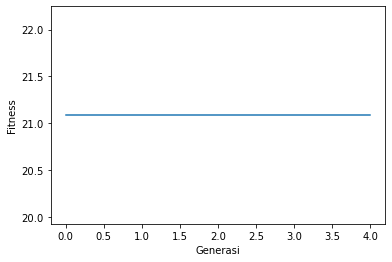

In [12]:

x = [i for i in range (max_generasi)]
plt.xlabel('Generasi')
plt.ylabel('Fitness')
plt.plot(x, progress_jalur)
print(progress_jalur)